In [58]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import logging
import requests
import datetime as dt
import pylab

import scipy.stats as stats
from matplotlib import pyplot

import numpy as np

import warnings
warnings.filterwarnings('ignore')

logging.getLogger().setLevel(logging.INFO)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os, sys

home = os.environ["HOME"]
sys.path.append(f"{home}/Desktop/project-ursa/lib")

import imp

In [68]:
result_df = pd.read_csv("../../data/lambda_sensitivity_results_2.csv")

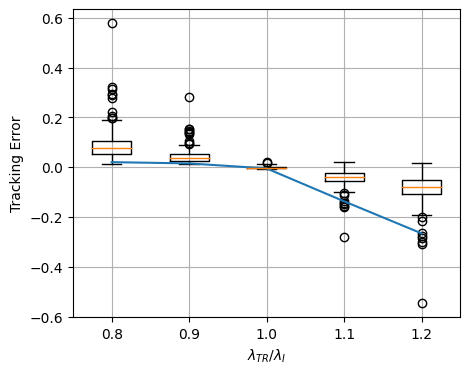

[0.014723185789495408, 0.009605086905201727, -0.006110956728772496, -0.15097585795642068, -0.2920801364973868]


In [69]:

offset = np.mean(result_df[result_df.lambda_C == 1.0].tracking_error_true.values)
data_08 = result_df[result_df.lambda_C == 0.8].tracking_error_true.values - offset
data_09 = result_df[result_df.lambda_C == 0.9].tracking_error_true.values - offset
data_10 = result_df[result_df.lambda_C == 1.0].tracking_error_true.values - offset
data_11 = result_df[result_df.lambda_C == 1.1].tracking_error_true.values - offset
data_12 = result_df[result_df.lambda_C == 1.2].tracking_error_true.values - offset
data    = [data_08, data_09, data_10, data_11, data_12]
var95   = [np.quantile(data_08, 0.05), np.quantile(data_09, 0.05), 
           np.quantile(data_10, 0.05), np.quantile(data_11, 0.05), np.quantile(data_12, 0.05)] 
    
    
fig = plt.figure(figsize =(5, 4))
bp = plt.boxplot(data)
plt.plot([1, 2, 3, 4, 5], var95)
plt.xticks([1, 2, 3, 4, 5], ["0.8", "0.9", "1.0", "1.1", "1.2"])
plt.ylabel("Tracking Error")
plt.xlabel("$\lambda_{TR}/\lambda_{I}$")
plt.grid()
plt.show()

print(var99)

In [70]:
np.mean(result_df[result_df.lambda_C == 1.0].unhedged_tracking_error_true.values)

-1.3541538081873137

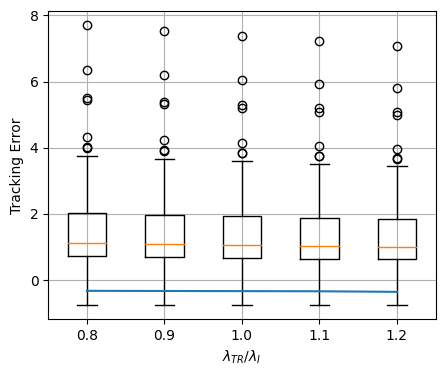

[-0.32864858933028007, -0.33320219471331164, -0.33766759496145515, -0.34204767502587247, -0.3598554640405836]


In [85]:

result_df["unhedged_tracking_error_init"] = (result_df["weekly_liq_unhedged_init"] - result_df["machine_cost"])/result_df["machine_cost"]
result_df["unhedged_tracking_error_true"] = (result_df["weekly_liq_unhedged_true"] - result_df["machine_cost"])/result_df["machine_cost"]


offset = np.mean(result_df[result_df.lambda_C == 1.0].unhedged_tracking_error_true.values)
# print(offset)

offset = 0
data_08 = result_df[result_df.lambda_C == 0.8].unhedged_tracking_error_true.values - offset
data_09 = result_df[result_df.lambda_C == 0.9].unhedged_tracking_error_true.values - offset
data_10 = result_df[result_df.lambda_C == 1.0].unhedged_tracking_error_true.values - offset
data_11 = result_df[result_df.lambda_C == 1.1].unhedged_tracking_error_true.values - offset
data_12 = result_df[result_df.lambda_C == 1.2].unhedged_tracking_error_true.values - offset
data    = [data_08, data_09, data_10, data_11, data_12]
 
var95   = [np.quantile(data_08, 0.05), np.quantile(data_09, 0.05), 
           np.quantile(data_10, 0.05), np.quantile(data_11, 0.05), np.quantile(data_12, 0.05)] 
    
fig = plt.figure(figsize =(5, 4))
bp = plt.boxplot(data)
plt.plot([1, 2, 3, 4, 5], var95)
plt.xticks([1, 2, 3, 4, 5], ["0.8", "0.9", "1.0", "1.1", "1.2"])
plt.ylabel("Tracking Error")
plt.xlabel("$\lambda_{TR}/\lambda_{I}$")
plt.grid()
plt.show()
print(var95)

In [79]:
np.quantile(result_df[result_df.lambda_C == 1.0].unhedged_tracking_error_true, 0.05)

-0.33766759496145515

In [78]:
result_df[result_df.lambda_C == 1.0].unhedged_tracking_error_true

200    0.122358
201    0.647366
202    1.130670
203   -0.333450
204    1.229533
         ...   
295    1.346487
296    5.286802
297    0.871770
298    1.071757
299    1.135214
Name: unhedged_tracking_error_true, Length: 100, dtype: float64